### Normalising Data

In [7]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pandas.read_csv('http://pogo.software/me4ml/tensile_strength.csv')
t = np.array(df['Temperature (deg C)'])
s = np.array(df['Ultimate tensile strength (Pa)'])

In [6]:
s_mean, s_std = np.mean(s), np.std(s)
t_mean, t_std = np.mean(t), np.std(t)
s_norm, t_norm = (s-s_mean)/s_std, (t-t_mean)/t_std

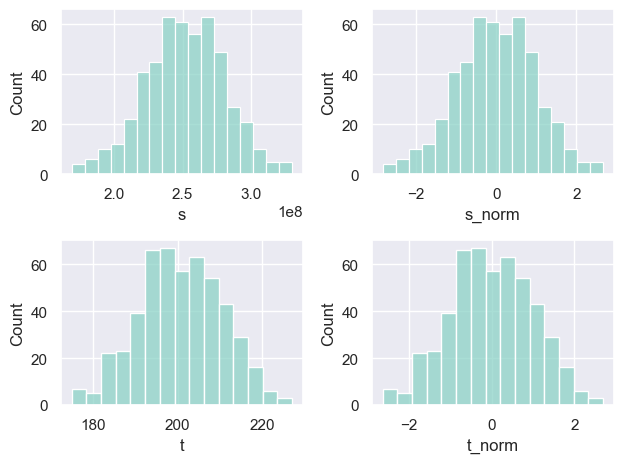

In [19]:
fig, ax = plt.subplots(nrows=2, ncols = 2)
sns.set_theme(palette='Set3')
sns.histplot(data = s, ax = ax[0,0]); ax[0,0].set_xlabel("s")
sns.histplot(data = s_norm, ax = ax[0,1]); ax[0,1].set_xlabel("s_norm")
sns.histplot(data = t, ax = ax[1,0]); ax[1,0].set_xlabel("t")
sns.histplot(data = t_norm, ax = ax[1,1]); ax[1,1].set_xlabel("t_norm")
plt.tight_layout()

### Linear Discriminant Functions

In [28]:
w = np.array([-1,-3]).transpose()
w0 = 1
x1, x2 = np.linspace (0,1,200), np.linspace(0,1,200)
x1_grid, x2_grid = np.meshgrid(x1,x2)
size = x1_grid.shape[0]*x1_grid.shape[1]
X = np.concatenate([x1_grid.reshape([size, 1]), x2_grid.reshape([size, 1])], axis = 1)
#g = np.dot(w,X.transpose()) + w0
g = np.transpose(np.dot(w,X.transpose())) + w0

In [31]:
print (w.shape, X.shape, g.shape)

(2,) (40000, 2) (40000,)
